In [13]:
#%%
# import tools

import requests
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import lxml.html as lh
import chromedriver_binary


import re
import pandas as pd
import numpy as np
from tabulate import tabulate
import os
import seaborn as sns
import matplotlib.pyplot as plt


import statsmodels.api as sm
from sklearn.linear_model import lars_path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
#%%
# Go to NEA site
url = "http://www.weather.gov.sg/climate-historical-daily/"
driver = webdriver.Chrome()
driver.get(url)


#%%
#Choose Newton
driver.find_element_by_xpath("//button[@id='cityname']").click()

elem_city = driver.find_element_by_xpath("//ul[@class='dropdown-menu long-dropdown']")
for option_city in elem_city.find_elements_by_tag_name('li'):
   # print(option_city)
   if option_city.text == 'Newton':
    option_city.click()


In [3]:
#%%
# Find the year button and choose Year


driver.find_element_by_xpath("//button[@id='year']").click()
elem_year = driver.find_element_by_xpath("//*[@id='yearDiv']/ul")

for option_year in elem_year.find_elements_by_tag_name('li'):
    try:
        driver.find_element_by_xpath("//button[@id='year']").click()
        time.sleep(1)
        option_year.click()
        time.sleep(2)
    except:
        print(option_year)
        driver.find_element_by_xpath("//button[@id='year']").click()
        option_year.click()
        time.sleep(2)


    #Choose Month
    driver.find_element_by_xpath("//button[@id='month']").click()
    elem_month = driver.find_element_by_xpath("//*[@id='monthDiv']/ul")
    print(elem_month.find_elements_by_tag_name('li'))
    for option_month in elem_month.find_elements_by_tag_name('li'):
        # print(option_month.text)
        try:
            driver.find_element_by_xpath("//button[@id='month']").click()
            option_month.click()
        except Exception as e:
            print(e)


        # Hit Display and wait
        driver.find_element_by_xpath("//input[@id='display']").click()
        driver.implicitly_wait(5)
        
        # Get the HTML table into pandas to become a dataframe
        soup=BeautifulSoup(driver.page_source,'html.parser')
#         allTables = soup.find_all('table')[0]
#         df = pd.read_html(allTables.prettify())
#         print(df)
#         time.sleep(3)
        
        allTables = soup.find_all('table')[0]
        df = pd.read_html(str(allTables),header=0)
        print(df)
        time.sleep(3)
#       Store the dataframe in a list
#       df.append(df[0]) ## this on good times gives me 2 dfs
        result = pd.concat([pd.DataFrame(df[i]) for i in range(len(df))],ignore_index=True) #this gives only 1 df

<selenium.webdriver.remote.webelement.WebElement (session="c688f286376261d40bcc560616346cb0", element="2cc104d6-86fc-4b51-b927-ab860157219c")>


StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=75.0.3770.142)


In [163]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
Date                             30 non-null object
Daily Rainfall Total (mm)        30 non-null float64
Highest 30-min Rainfall (mm)     30 non-null object
Highest 60-min Rainfall (mm)     30 non-null object
Highest 120-min Rainfall (mm)    30 non-null object
Mean Temperature (°C)            30 non-null object
Maximum Temperature (°C)         30 non-null float64
Minimum Temperature (°C)         30 non-null float64
Mean Wind Speed (km/h)           30 non-null float64
Max Wind Speed (km/h)            30 non-null float64
dtypes: float64(5), object(5)
memory usage: 2.4+ KB


In [164]:
result.tail(60) #previously there were 60 rows

,Date,Daily Rainfall Total (mm),Highest 30-min Rainfall (mm),Highest 60-min Rainfall (mm),Highest 120-min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,1 Nov,0.0,—,—,—,27.2,33.1,24.0,5.5,28.1
1,2 Nov,32.6,—,—,—,27,33.5,23.4,5.3,44.6
2,3 Nov,1.0,—,—,—,27.7,30.5,25.2,5.0,27.0
3,4 Nov,10.2,—,—,—,27.4,30.4,25.5,7.5,42.5
4,5 Nov,38.2,—,—,—,25.4,30.0,23.4,4.7,29.5
5,6 Nov,9.2,—,—,—,26.4,29.8,24.3,4.7,23.8
6,7 Nov,0.0,—,—,—,27.5,31.5,24.4,5.9,25.2
7,8 Nov,5.0,—,—,—,—,33.0,25.3,6.7,32.8
8,9 Nov,37.8,—,—,—,—,29.3,23.3,5.4,36.4
9,10 Nov,0.0,—,—,—,26.3,30.4,24.2,4.9,26.3


In [165]:
# Duplicate the df and strip column spaces
result1= result.copy()
result1.rename(columns=lambda x: x.strip())


,Date,Daily Rainfall Total (mm),Highest 30-min Rainfall (mm),Highest 60-min Rainfall (mm),Highest 120-min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,1 Nov,0.0,—,—,—,27.2,33.1,24.0,5.5,28.1
1,2 Nov,32.6,—,—,—,27,33.5,23.4,5.3,44.6
2,3 Nov,1.0,—,—,—,27.7,30.5,25.2,5.0,27.0
3,4 Nov,10.2,—,—,—,27.4,30.4,25.5,7.5,42.5
4,5 Nov,38.2,—,—,—,25.4,30.0,23.4,4.7,29.5
5,6 Nov,9.2,—,—,—,26.4,29.8,24.3,4.7,23.8
6,7 Nov,0.0,—,—,—,27.5,31.5,24.4,5.9,25.2
7,8 Nov,5.0,—,—,—,—,33.0,25.3,6.7,32.8
8,9 Nov,37.8,—,—,—,—,29.3,23.3,5.4,36.4
9,10 Nov,0.0,—,—,—,26.3,30.4,24.2,4.9,26.3


In [166]:
# Convert the objects in rainfall and mean temperature column to float

result1[["Highest 30-min Rainfall (mm)","Highest 60-min Rainfall (mm)","Highest 120-min Rainfall (mm)","Mean Temperature (°C)"]] = \
result1[["Highest 30-min Rainfall (mm)","Highest 60-min Rainfall (mm)","Highest 120-min Rainfall (mm)","Mean Temperature (°C)"]].apply(pd.to_numeric,downcast = 'float', errors='coerce')

# #check result1
# print(result1[["Highest 30-min Rainfall (mm)","Highest 60-min Rainfall (mm)"]]) 

In [167]:
# Check that date is the only object column
result1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
Date                             30 non-null object
Daily Rainfall Total (mm)        30 non-null float64
Highest 30-min Rainfall (mm)     0 non-null float32
Highest 60-min Rainfall (mm)     0 non-null float32
Highest 120-min Rainfall (mm)    0 non-null float32
Mean Temperature (°C)            25 non-null float32
Maximum Temperature (°C)         30 non-null float64
Minimum Temperature (°C)         30 non-null float64
Mean Wind Speed (km/h)           30 non-null float64
Max Wind Speed (km/h)            30 non-null float64
dtypes: float32(4), float64(5), object(1)
memory usage: 2.0+ KB


In [168]:
result1.head()

,Date,Daily Rainfall Total (mm),Highest 30-min Rainfall (mm),Highest 60-min Rainfall (mm),Highest 120-min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,1 Nov,0.0,NaN,NaN,NaN,27.200001,33.1,24.0,5.5,28.1
1,2 Nov,32.6,NaN,NaN,NaN,27.000000,33.5,23.4,5.3,44.6
2,3 Nov,1.0,NaN,NaN,NaN,27.700001,30.5,25.2,5.0,27.0
3,4 Nov,10.2,NaN,NaN,NaN,27.400000,30.4,25.5,7.5,42.5
4,5 Nov,38.2,NaN,NaN,NaN,25.400000,30.0,23.4,4.7,29.5


In [171]:
#Remove all NaN rows as there were missing data prior to 2014
resultfr2014 = result1.dropna() 
resultfr2014.info()
resultfr2014.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
Date                             0 non-null object
Daily Rainfall Total (mm)        0 non-null float64
Highest 30-min Rainfall (mm)     0 non-null float32
Highest 60-min Rainfall (mm)     0 non-null float32
Highest 120-min Rainfall (mm)    0 non-null float32
Mean Temperature (°C)            0 non-null float32
Maximum Temperature (°C)         0 non-null float64
Minimum Temperature (°C)         0 non-null float64
Mean Wind Speed (km/h)           0 non-null float64
Max Wind Speed (km/h)            0 non-null float64
dtypes: float32(4), float64(5), object(1)
memory usage: 0.0+ bytes


,Date,Daily Rainfall Total (mm),Highest 30-min Rainfall (mm),Highest 60-min Rainfall (mm),Highest 120-min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)


In [ ]:
#Remove Changi data that was captured at the start of scrapping and re-index
resultNewton = resultfr2014.drop(resultfr2014.tail(30).index,inplace=True)

In [ ]:
#Check Newton Results
resultNewton.info()
resultNewton.shape

## Import with June csv to try##

In [25]:
import os
print(os.getcwd())

C:\Users\regina\Desktop\Metis\cookbook\Project2


In [92]:
os.chdir('C:\\Users\\regina\\Desktop\\Metis\\cookbook\\Project2')
NewtonJun = pd.read_csv('NewtonJun2019.csv')
# resultNewton = pd.read_csv("Project2/Newton Jun 2019.csv")
NewtonMay = pd.read_csv('NewtonMay2019.csv')


In [93]:
JunMay=NewtonJun.append(NewtonMay)
#result = pd.concat([pd.DataFrame(df[i]) for i in range(len(df))],ignore_index=True)

In [94]:
JunMay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 30
Data columns (total 10 columns):
Date                             61 non-null object
Daily Rainfall Total (mm)        61 non-null float64
Highest  30-min Rainfall (mm)    61 non-null float64
Highest  60-min Rainfall (mm)    61 non-null float64
Highest 120-min Rainfall (mm)    61 non-null float64
Mean Temperature (°C)            61 non-null float64
Maximum Temperature (°C)         61 non-null float64
Minimum Temperature (°C)         61 non-null float64
Mean Wind Speed (km/h)           61 non-null float64
Max Wind Speed (km/h)            61 non-null float64
dtypes: float64(9), object(1)
memory usage: 5.2+ KB


In [95]:
JunMay.drop(JunMay.tail(4).index,inplace=True) #.reset_index()

In [96]:
df = JunMay.replace('?', np.NaN).dropna().reset_index()

In [97]:
df.tail()

,index,Date,Daily Rainfall Total (mm),Highest 30-min Rainfall (mm),Highest 60-min Rainfall (mm),Highest 120-min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
49,22,23-May,0.0,0.0,0.0,0.0,28.8,32.2,25.8,8.6,44.3
50,23,24-May,0.0,0.0,0.0,0.0,29.8,34.7,28.0,7.9,30.6
51,24,25-May,0.0,0.0,0.0,0.0,29.0,32.4,27.6,8.3,41.8
52,25,26-May,0.0,0.0,0.0,0.0,29.3,33.6,27.6,8.3,35.3
53,26,27-May,7.0,6.8,6.8,6.8,28.9,32.8,25.6,10.4,47.5


In [98]:
#be careful not to use this anymore as the index is not reset
JunMay.tail()

,Date,Daily Rainfall Total (mm),Highest 30-min Rainfall (mm),Highest 60-min Rainfall (mm),Highest 120-min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
22,23-May,0.0,0.0,0.0,0.0,28.8,32.2,25.8,8.6,44.3
23,24-May,0.0,0.0,0.0,0.0,29.8,34.7,28.0,7.9,30.6
24,25-May,0.0,0.0,0.0,0.0,29.0,32.4,27.6,8.3,41.8
25,26-May,0.0,0.0,0.0,0.0,29.3,33.6,27.6,8.3,35.3
26,27-May,7.0,6.8,6.8,6.8,28.9,32.8,25.6,10.4,47.5


In [33]:
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


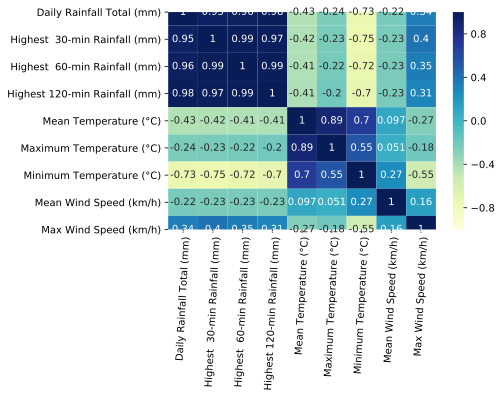

In [39]:
# use heatmap to see correlation
sns.heatmap(JunMay.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1);
plt.xticks(rotation=87)
plt.savefig("correlation.svg")

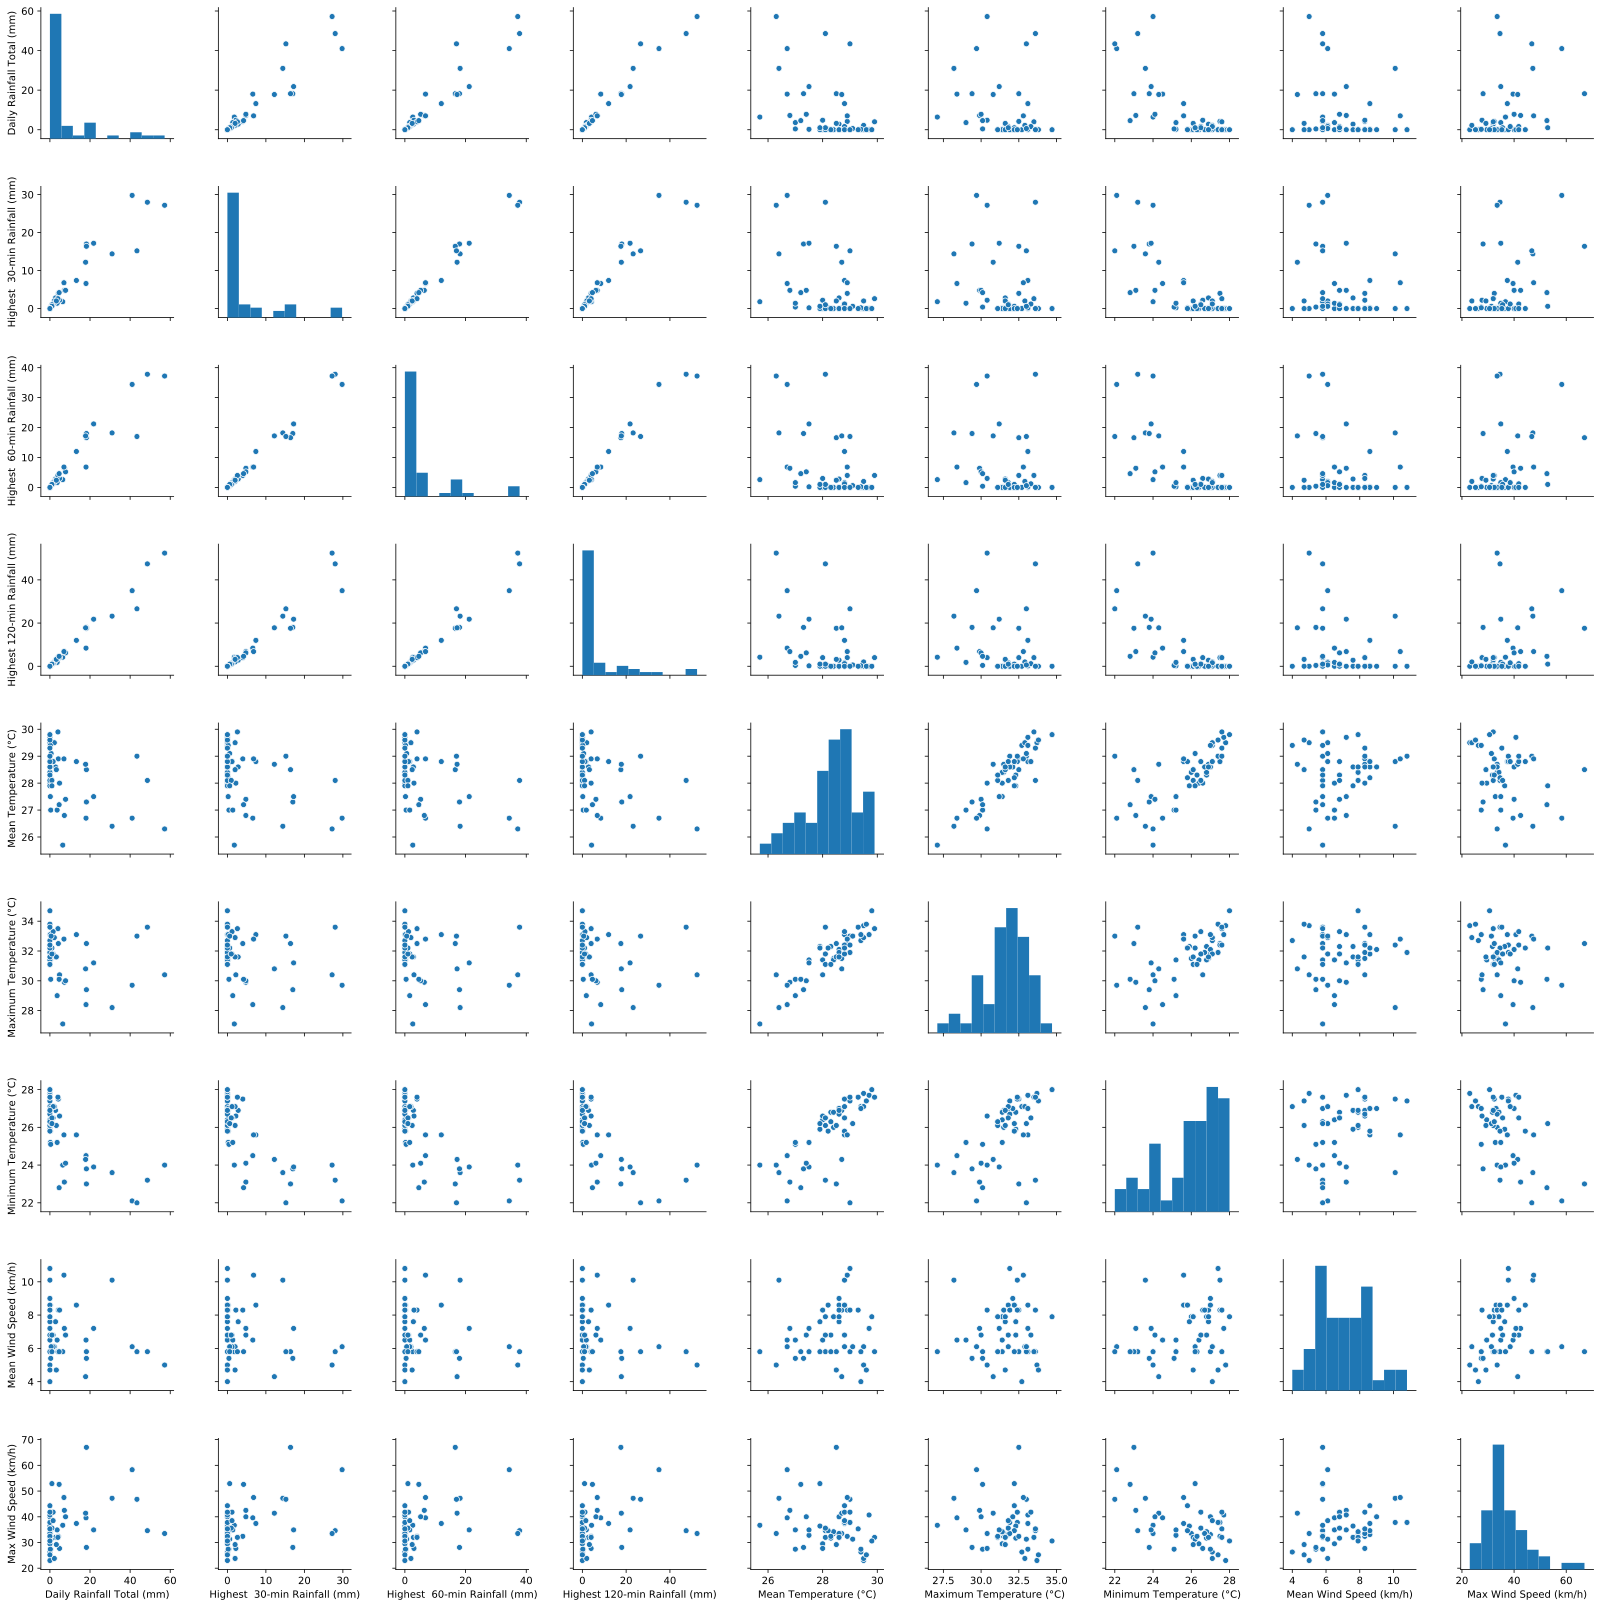

In [99]:
sns.pairplot(JunMay)
plt.savefig("pairplot.svg")

In [100]:
JunMay.describe()

,Daily Rainfall Total (mm),Highest 30-min Rainfall (mm),Highest 60-min Rainfall (mm),Highest 120-min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,7.281481,4.381481,5.340741,6.244444,28.307407,31.687037,25.831481,7.009259,36.425926
std,13.439762,7.620852,9.537503,11.694067,0.968923,1.535743,1.611846,1.584270,8.449387
min,0.000000,0.000000,0.000000,0.000000,25.700000,27.100000,22.000000,4.000000,23.000000
25%,0.000000,0.000000,0.000000,0.000000,27.900000,31.100000,24.650000,5.800000,32.000000
50%,0.800000,0.600000,0.800000,0.800000,28.550000,31.850000,26.250000,6.800000,34.600000
75%,6.850000,4.650000,5.050000,5.800000,28.900000,32.775000,27.000000,8.300000,40.000000
max,57.200000,29.800000,37.800000,52.400000,29.900000,34.700000,28.000000,10.800000,67.000000


## Model 1 - All Columns##

In [101]:
# slice data into features and target
X = JunMay.drop(columns=["Mean Temperature (°C)", "Date"]).astype(float)
y = JunMay.loc[:,"Mean Temperature (°C)"].astype(float)

In [15]:
# fit model with target as Mean Temperature (°C)
mean_temp = sm.OLS(y, X, data=JunMay)

mean_temp_analysis = mean_temp.fit()

# summarize our model
mean_temp_analysis.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Mean Temperature (°C)   R-squared (uncentered):                   1.000
Model:                               OLS   Adj. R-squared (uncentered):              1.000
Method:                    Least Squares   F-statistic:                          2.748e+04
Date:                   Sun, 21 Jul 2019   Prob (F-statistic):                    6.12e-82
Time:                           01:27:09   Log-Likelihood:                         -28.431
No. Observations:                     54   AIC:                                      72.86
Df Residuals:                         46   BIC:                                      88.77
Df Model:                              8                                                  
Covariance Type:               nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Daily Rainfall Total (mm)         0.1020      0.032      3.164      0.003       0.037       0.167
Highest  30-min Rainfall (mm)     0.0510      0.087      0.588      0.560      -0.124       0.226
Highest  60-min Rainfall (mm)     0.0863      0.106      0.817      0.418      -0.126       0.299
Highest 120-min Rainfall (mm)    -0.1989      0.071     -2.805      0.007      -0.342      -0.056
Maximum Temperature (°C)          0.5037      0.053      9.548      0.000       0.398       0.610
Minimum Temperature (°C)          0.4611      0.063      7.309      0.000       0.334       0.588
Mean Wind Speed (km/h)           -0.0620      0.044     -1.411      0.165      -0.150       0.026
Max Wind Speed (km/h)             0.0186      0.009      2.020      0.049    6.18e-05       0.037
==============================================================================
Omnibus:                        0.592   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.170
Skew:                          -0.109   Prob(JB):                        0.918
Kurtosis:                       3.169   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

Computing regularization path using the LARS ...


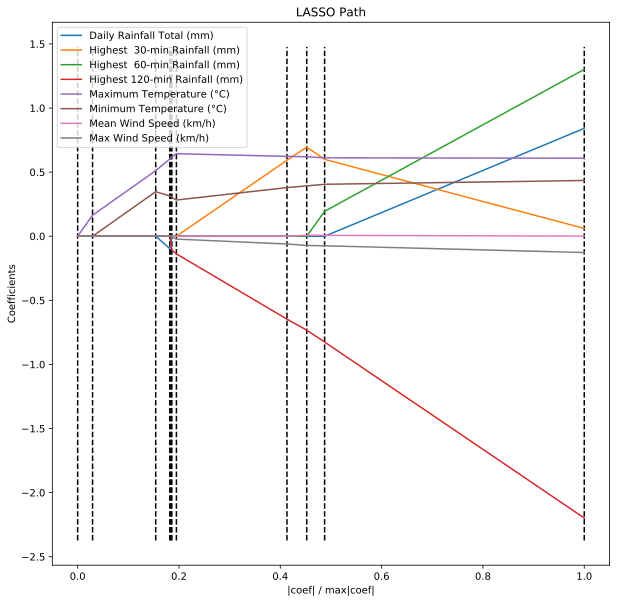

<Figure size 432x288 with 0 Axes>

In [104]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

# Finding the lars paths
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

# plotting the LARS path
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()
plt.savefig("LASSO_all_orig.svg")

## Model 2. Feature Engineering- Log windspeed ##

<Figure size 720x432 with 0 Axes>

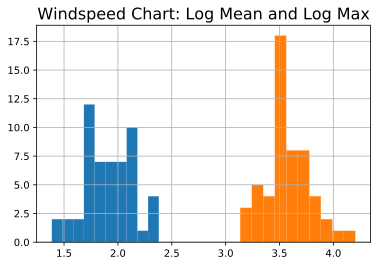

<Figure size 720x432 with 0 Axes>

In [119]:
# take log of windspeed and graph
JunMay['log_mean_wind']=np.log(JunMay['Mean Wind Speed (km/h)'])
JunMay['log_max_wind']=np.log(JunMay['Max Wind Speed (km/h)'])
# looks better

plt.title('Windspeed Chart: Log Mean and Log Max',fontsize = 16)

JunMay.log_mean_wind.hist();
JunMay.log_max_wind.hist();

plt.figure(figsize=[10,6])


In [145]:
#Drop the original mean and max windspeed and replace with log windspeed
logwind=JunMay.copy()
logwind.drop(['Mean Wind Speed (km/h)','Max Wind Speed (km/h)'], axis=1, inplace=True)
logwind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 26
Data columns (total 10 columns):
Date                             54 non-null object
Daily Rainfall Total (mm)        54 non-null float64
Highest  30-min Rainfall (mm)    54 non-null float64
Highest  60-min Rainfall (mm)    54 non-null float64
Highest 120-min Rainfall (mm)    54 non-null float64
Mean Temperature (°C)            54 non-null float64
Maximum Temperature (°C)         54 non-null float64
Minimum Temperature (°C)         54 non-null float64
log_mean_wind                    54 non-null float64
log_max_wind                     54 non-null float64
dtypes: float64(9), object(1)
memory usage: 4.6+ KB


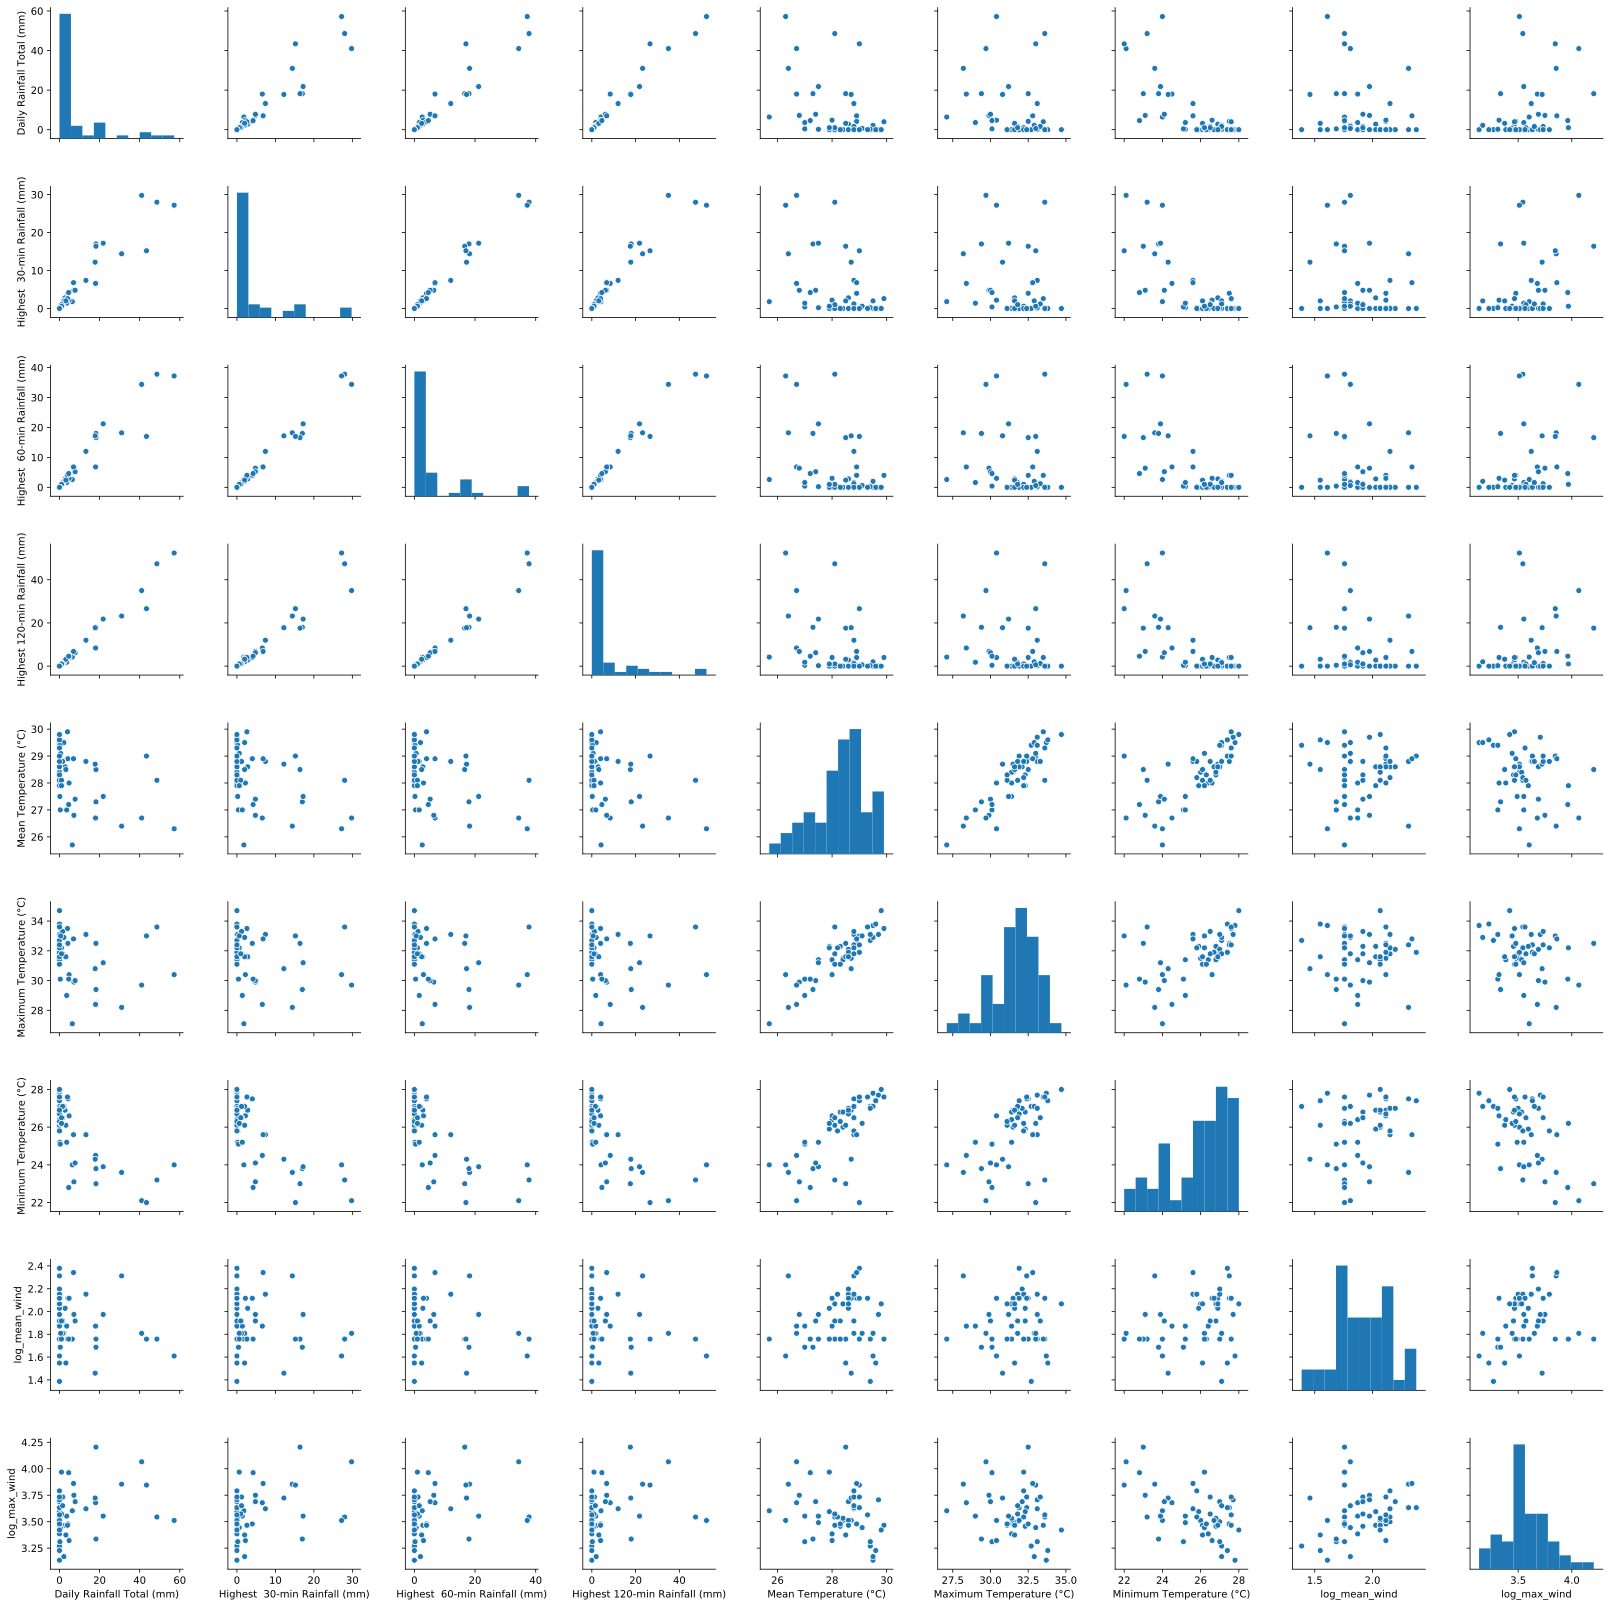

In [87]:
sns.pairplot(logwind)
plt.savefig("pairplot_logwind.svg")

In [109]:
#
X = logwind.drop(columns=["Mean Temperature (°C)", "Date"]).astype(float)
y = logwind.loc[:,"Mean Temperature (°C)"].astype(float)

# fit model with target as Mean Temperature (°C)
mean_temp_logwind = sm.OLS(y, X, data=logwind)

mean_temp_logwind_analysis = mean_temp_logwind.fit()

# summarize our model
mean_temp_logwind_analysis.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Mean Temperature (°C)   R-squared (uncentered):                   1.000
Model:                               OLS   Adj. R-squared (uncentered):              1.000
Method:                    Least Squares   F-statistic:                          3.276e+04
Date:                   Tue, 23 Jul 2019   Prob (F-statistic):                    1.08e-83
Time:                           00:33:16   Log-Likelihood:                         -23.686
No. Observations:                     54   AIC:                                      63.37
Df Residuals:                         46   BIC:                                      79.28
Df Model:                              8                                                  
Covariance Type:               nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Daily Rainfall Total (mm)         0.0817      0.030      2.691      0.010       0.021       0.143
Highest  30-min Rainfall (mm)     0.0476      0.079      0.606      0.548      -0.110       0.206
Highest  60-min Rainfall (mm)     0.0639      0.097      0.660      0.512      -0.131       0.259
Highest 120-min Rainfall (mm)    -0.1630      0.066     -2.472      0.017      -0.296      -0.030
Maximum Temperature (°C)          0.4762      0.048      9.865      0.000       0.379       0.573
Minimum Temperature (°C)          0.4134      0.057      7.212      0.000       0.298       0.529
log_mean_wind                    -0.5353      0.285     -1.879      0.067      -1.109       0.038
log_max_wind                      0.9620      0.255      3.776      0.000       0.449       1.475
==============================================================================
Omnibus:                        4.050   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.013
Skew:                          -0.461   Prob(JB):                        0.222
Kurtosis:                       3.699   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## LASSO on Model 2 (Logwind) ##

Computing regularization path using the LARS ...


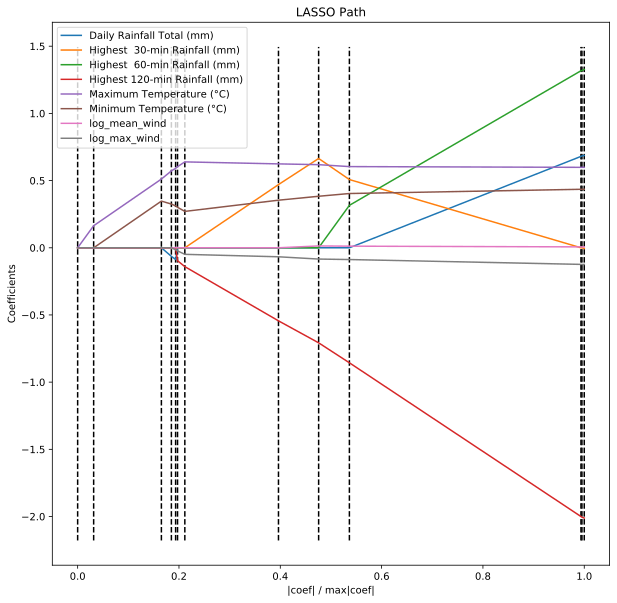

<Figure size 432x288 with 0 Axes>

In [110]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

## Scale the variables
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

# Finding the lars paths
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

# plotting the LARS path
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()
plt.savefig("LASSO_logwind.svg")

## Ridge on Model 2 (Ridge) ##

Computing regularization path using the LARS ...


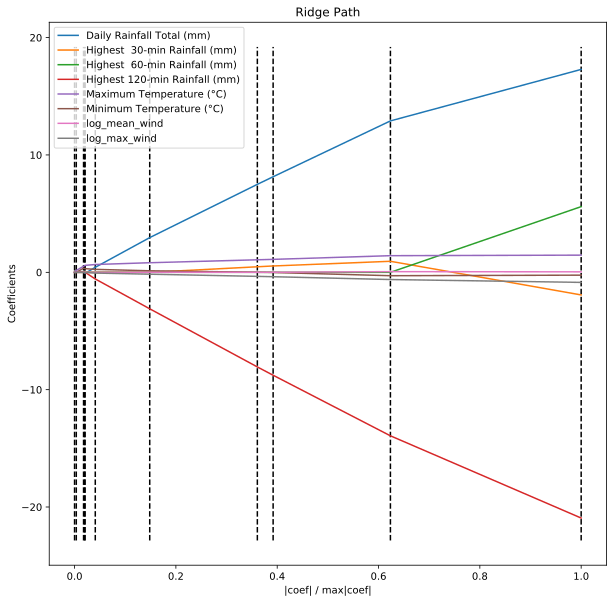

<Figure size 432x288 with 0 Axes>

In [111]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

# Finding the lars paths
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='Ridge')

# plotting the LARS path
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('Ridge Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()
plt.savefig("Rdige_logwind.svg")

## Model 3 - Just Daily Rainfall and Highest 120-min Rainfall##

In [160]:
logwind.columns

Index(['Date', 'Daily Rainfall Total (mm)', 'Highest  30-min Rainfall (mm)',
       'Highest  60-min Rainfall (mm)', 'Highest 120-min Rainfall (mm)',
       'Mean Temperature (°C)', 'Maximum Temperature (°C)',
       'Minimum Temperature (°C)', 'log_mean_wind', 'log_max_wind'],
      dtype='object')

In [165]:
drop2 = logwind.drop(['Highest  30-min Rainfall (mm)'], axis=1)

KeyError: "['Highest  30-min Rainfall (mm)'] not found in axis"

In [161]:
Dailyn120= logwind[['Date', 'Daily Rainfall Total (mm)','Highest 120-min Rainfall (mm)',
       'Mean Temperature (°C)', 'Maximum Temperature (°C)',
       'Minimum Temperature (°C)']]

In [164]:
Dailyn120.describe()

,Daily Rainfall Total (mm),Highest 120-min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C)
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,7.281481,6.244444,28.307407,31.687037,25.831481
std,13.439762,11.694067,0.968923,1.535743,1.611846
min,0.000000,0.000000,25.700000,27.100000,22.000000
25%,0.000000,0.000000,27.900000,31.100000,24.650000
50%,0.800000,0.800000,28.550000,31.850000,26.250000
75%,6.850000,5.800000,28.900000,32.775000,27.000000
max,57.200000,52.400000,29.900000,34.700000,28.000000


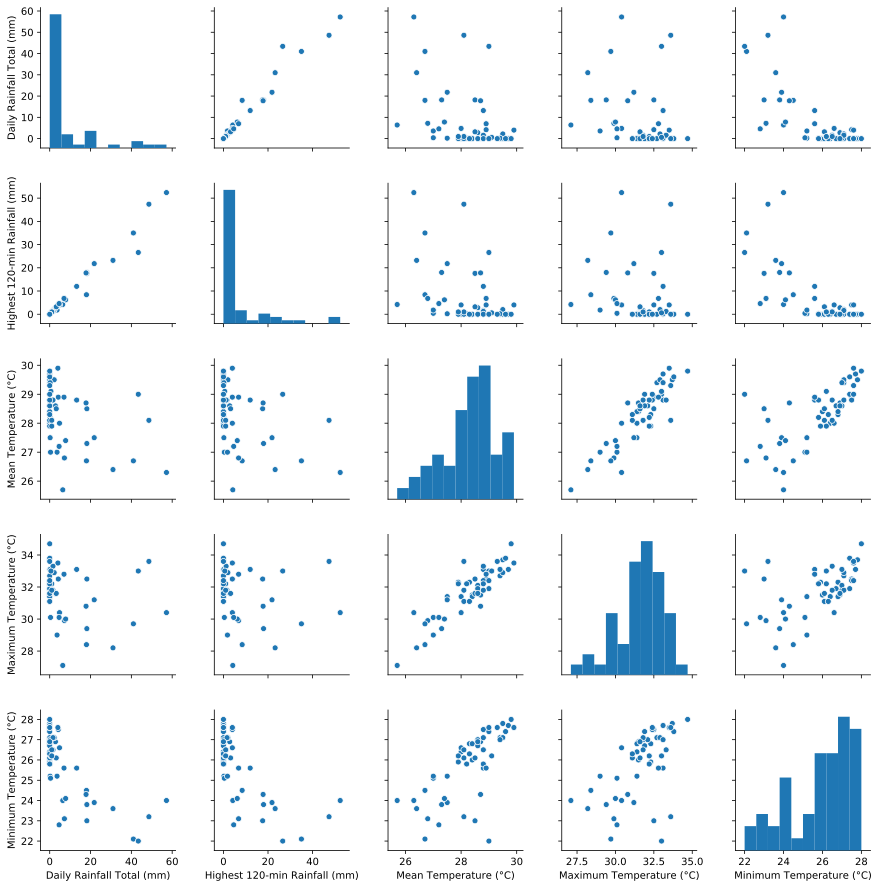

In [166]:
sns.pairplot(Dailyn120)
plt.savefig("pairplot_Dailyn120.svg")

In [168]:
#
X = Dailyn120.drop(columns=["Mean Temperature (°C)", "Date"]).astype(float)
y = Dailyn120.loc[:,"Mean Temperature (°C)"].astype(float)

# fit model with target as Mean Temperature (°C)
mean_temp_Dailyn120 = sm.OLS(y, X, data=Dailyn120)

mean_temp_Dailyn120_analysis = mean_temp_Dailyn120.fit()

# summarize our model
mean_temp_Dailyn120_analysis.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Mean Temperature (°C)   R-squared (uncentered):                   1.000
Model:                               OLS   Adj. R-squared (uncentered):              1.000
Method:                    Least Squares   F-statistic:                          3.979e+04
Date:                   Tue, 23 Jul 2019   Prob (F-statistic):                    6.90e-87
Time:                           10:26:52   Log-Likelihood:                         -39.399
No. Observations:                     54   AIC:                                      86.80
Df Residuals:                         50   BIC:                                      94.75
Df Model:                              4                                                  
Covariance Type:               nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Daily Rainfall Total (mm)         0.0863      0.029      2.998      0.004       0.028       0.144
Highest 120-min Rainfall (mm)    -0.0800      0.033     -2.420      0.019      -0.146      -0.014
Maximum Temperature (°C)          0.5911      0.055     10.770      0.000       0.481       0.701
Minimum Temperature (°C)          0.3652      0.066      5.523      0.000       0.232       0.498
==============================================================================
Omnibus:                        3.172   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                2.213
Skew:                           0.355   Prob(JB):                        0.331
Kurtosis:                       3.692   Cond. No.                         51.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 4 - Just Logwind##

In [193]:
logwind.columns

Index(['Date', 'Daily Rainfall Total (mm)', 'Highest  30-min Rainfall (mm)',
       'Highest  60-min Rainfall (mm)', 'Highest 120-min Rainfall (mm)',
       'Mean Temperature (°C)', 'Maximum Temperature (°C)',
       'Minimum Temperature (°C)', 'log_mean_wind', 'log_max_wind'],
      dtype='object')

In [194]:
justlogwind= logwind[['Date', 'Mean Temperature (°C)','log_mean_wind', 'log_max_wind']]
justlogwind.columns = ['Date', 'Mean_Temperature','log_mean_wind', 'log_max_wind']
justlogwind.columns

Index(['Date', 'Mean_Temperature', 'log_mean_wind', 'log_max_wind'], dtype='object')

In [196]:
X = justlogwind.drop(columns=["Mean_Temperature", "Date"]).astype(float)
y = justlogwind.loc[:,"Mean_Temperature"].astype(float)

# fit model with target as Mean Temperature (°C)
mean_temp_justlogwind = sm.OLS(y, X, data=justlogwind)

mean_temp_justlogwind_analysis = mean_temp_justlogwind.fit()

# summarize our model
mean_temp_justlogwind_analysis.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Mean_Temperature   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              4873.
Date:                Tue, 23 Jul 2019   Prob (F-statistic):                    7.03e-60
Time:                        15:31:41   Log-Likelihood:                         -115.74
No. Observations:                  54   AIC:                                      235.5
Df Residuals:                      52   BIC:                                      239.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
log_mean_wind     2.9226      1.254      2.331      0.024       0.406       5.439
log_max_wind      6.3232      0.678      9.323      0.000       4.962       7.684
==============================================================================
Omnibus:                        1.545   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                0.815
Skew:                           0.235   Prob(JB):                        0.665
Kurtosis:                       3.376   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\users\regina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\regina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


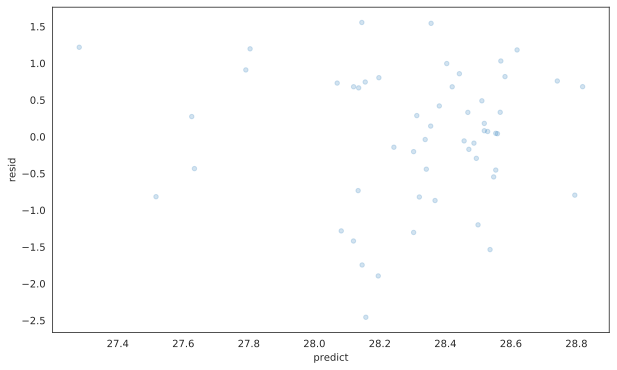

In [197]:
# Plot the residuals

# develop OLS with Sklearn
lr = LinearRegression()
fit = lr.fit(X,y) # for later use
# Plot predicted values on the x-axis, and residuals on the y-axis

justlogwind['predict']=fit.predict(X)
justlogwind['resid']=justlogwind.Mean_Temperature-justlogwind.predict
with sns.axes_style('white'):
    plot=justlogwind.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))
    


In [199]:
justlogwind.columns

Index(['Date', 'Mean_Temperature', 'log_mean_wind', 'log_max_wind', 'predict',
       'resid'],
      dtype='object')

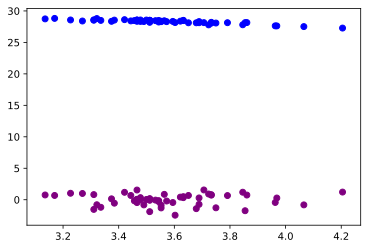

In [207]:
# quick reg plot between predict and residual errors


plt.scatter(justlogwind.log_max_wind,justlogwind.predict,color = 'Blue')
plt.scatter(justlogwind.log_max_wind,justlogwind.resid, color = 'Purple');